# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1: Reading and Understanding the Data

### Importing data using the pandas library

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

### Understanding the structure of the data

In [3]:
# Reading the data from the csv file
bikeSharing = pd.read_csv('day.csv')

In [4]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking the number of rows and columns in the data
bikeSharing.shape

(730, 16)

In [6]:
# Checking the column-wise info of the dataset
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking the summary of the numerical columns present in the dataset
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking the columns present in the dataset
bikeSharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bikeSharing.size

11680

# Step 2: Data Quality Check

### Checking for null values in data

In [10]:
bikeSharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Checking if duplicate rows are present in the data

In [11]:
bikeSharing_duplicate = bikeSharing.copy()

# Checking for duplicates and dropping the entire row if any duplicate is present
bikeSharing_duplicate.drop_duplicates(subset=None, inplace=True)

In [12]:
bikeSharing_duplicate.shape

(730, 16)

##### As the number of rows (after removing the duplicate rows if any) are same as the original data, so we can say that there are no duplicate rows present in the data

### Cleaning of Data

##### Looking at data dictionary,we can drop these columns:
- "instant" is records index which is not significant for further analysis
- "dteday" is date which is of no use as we already have column "yr" and "mnth" for date
- "causal" and "registered" both columns contain counts of bike booked by causal and registered users, but we already have"cnt" column which contain counts of total rental bike including both causal and registered


In [13]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as as we have cnt column which is sum of the both (casual+registered) and cnt is our target column

bikeSharing.drop(['casual'], axis = 1, inplace = True)
bikeSharing.drop(['registered'], axis = 1, inplace = True)

In [14]:
# Checking number of rows and columns after droping some of the columns
bikeSharing.shape

(730, 12)

### Renaming some columns for better readability

In [15]:
bikeSharing.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bikeSharing.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting the columns into proper datatype

In [18]:
#Changing some of the columns from int to category to increase the understanding and readability
cat_list=['season','Year','month','holiday','weekday','workingday','weathersit']
bikeSharing[cat_list]=bikeSharing[cat_list].astype('category')

#Changing some of the columns to numeric data
bikeSharing[['temp','atemp','humidity','windspeed','count']]=bikeSharing[['temp','atemp','humidity','windspeed','count']].apply(pd.to_numeric)

In [18]:
bikeSharing['season']=bikeSharing.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikeSharing['month']=bikeSharing.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weathersit']=bikeSharing.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikeSharing['weekday']=bikeSharing.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikeSharing.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   Year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


### Mapping some of the variables into Categorical strings

In [20]:
bikeSharing['season']=bikeSharing.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikeSharing['month']=bikeSharing.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weathersit']=bikeSharing.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikeSharing['weekday']=bikeSharing.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikeSharing.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 3: Visualisation of Data

In [21]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numerical Variables

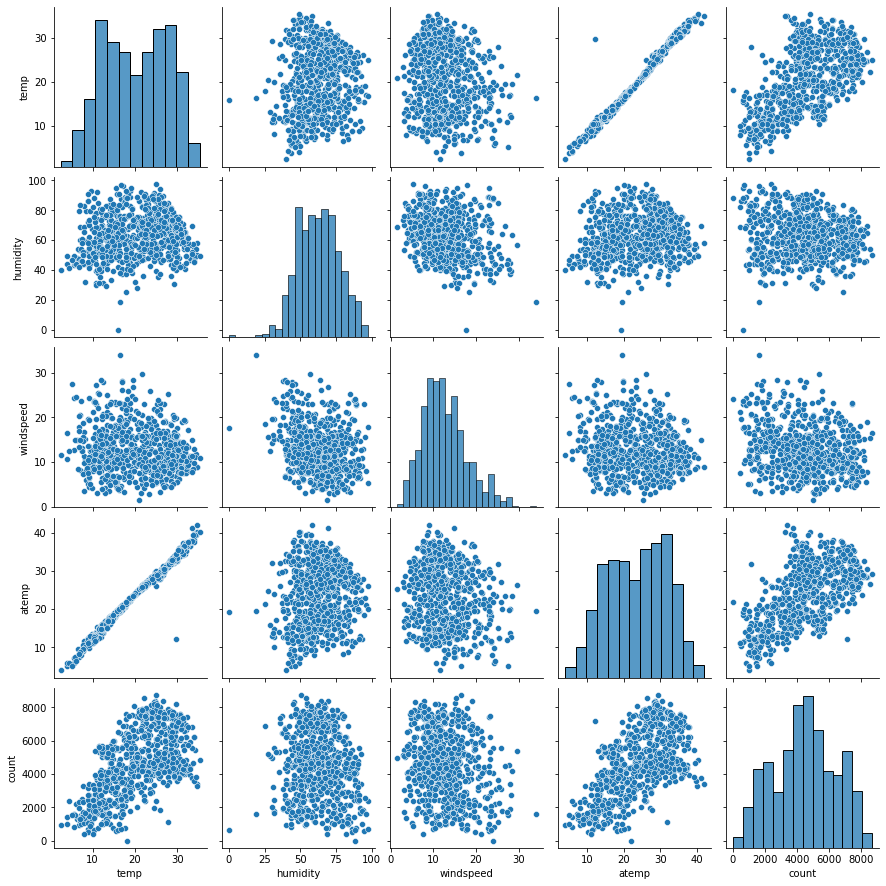

In [26]:
# Pairplot for continuous variables
sns.pairplot(bikeSharing, vars=["temp", "humidity",'windspeed','atemp','count'])
plt.show()

#### It can be observed that temp, atemp and count have linear relationship

### Visualising Categorical Columns

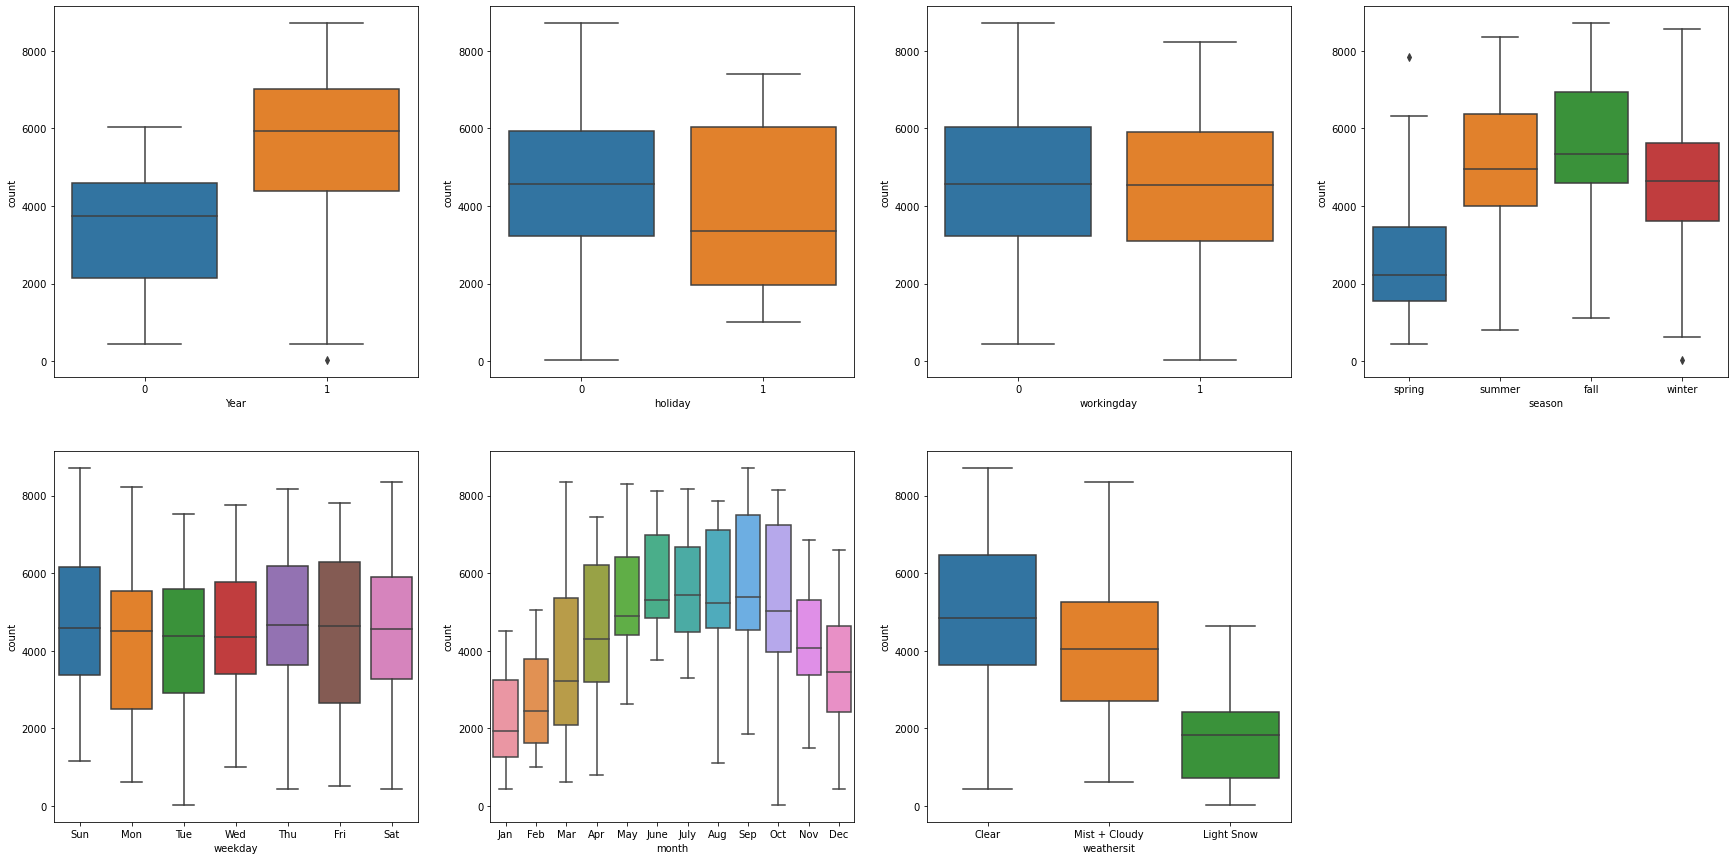

In [23]:
#Boxplots for categorical columns

plt.figure(figsize=(30, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bikeSharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bikeSharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bikeSharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'season', y = 'count', data = bikeSharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = bikeSharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'month', y = 'count', data = bikeSharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bikeSharing)
plt.show()


### Correlation Visualisation using HeatMap

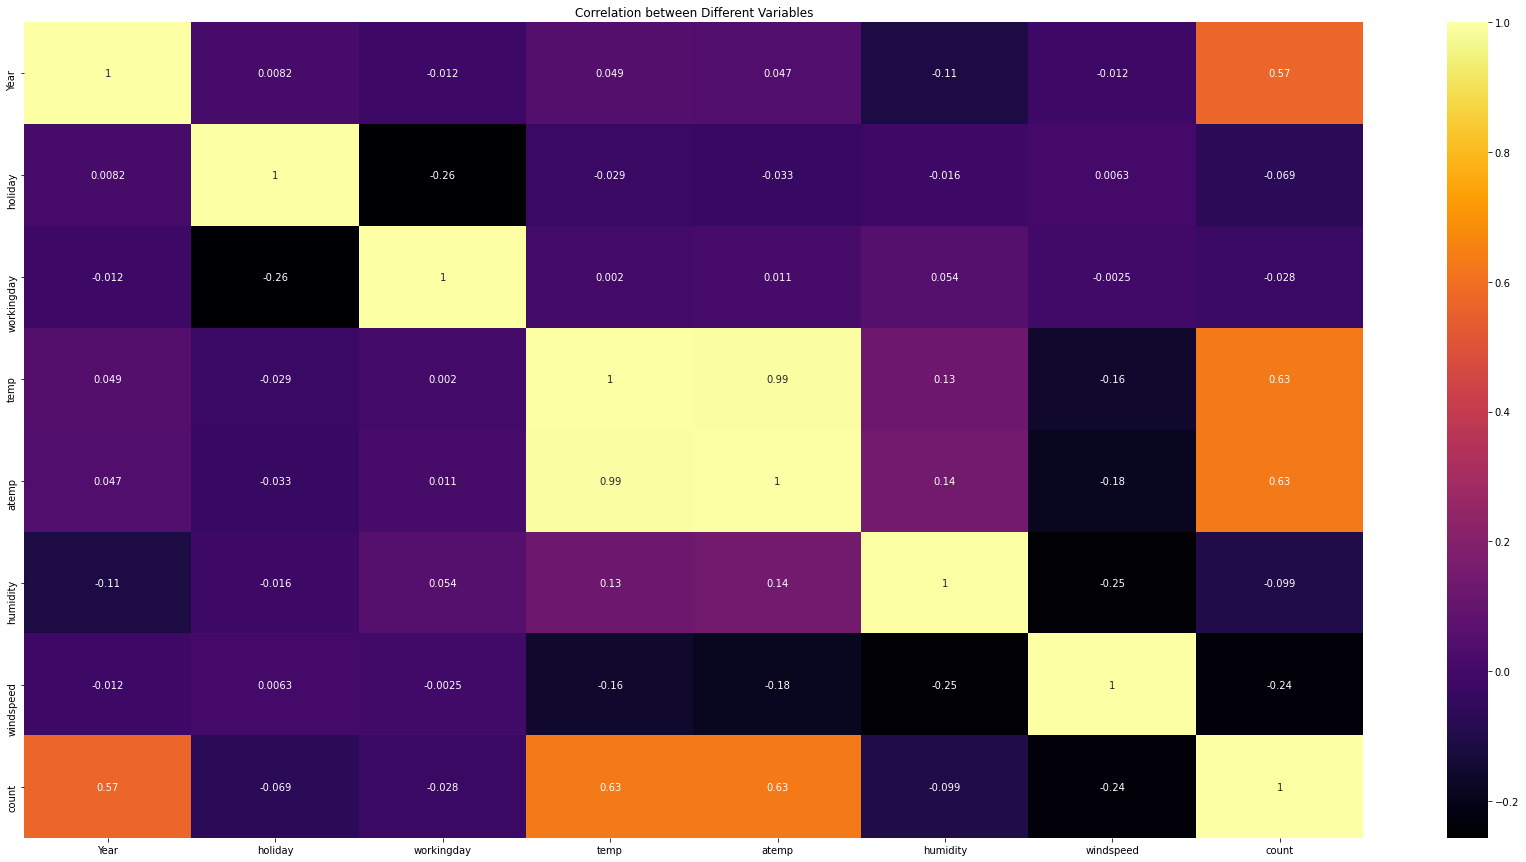

In [22]:
plt.figure(figsize=(30, 15))
sns.heatmap(bikeSharing.corr(), cmap='inferno', annot = True)
plt.title("Correlation between Different Variables")
plt.show()

##### Inferences: 
- There is positive correlation between "count" and "temp"(0.63).
- There is negative correlation between "count" and "humidity"(-0.099) ,"count" and "windspeed"(-0.24) and some more.

# Step 4: Data Preparation 

### Creating Dummy variables

In [27]:
# Creating dummy variables for month, weekday,weathersit,season columns

months=pd.get_dummies(bikeSharing.month,drop_first=True)
weekdays=pd.get_dummies(bikeSharing.weekday,drop_first=True)
weather_sit=pd.get_dummies(bikeSharing.weathersit,drop_first=True)
seasons=pd.get_dummies(bikeSharing.season,drop_first=True)

In [28]:
# Adding dummy variables columns in the original data
bikeSharing=pd.concat([months,weekdays,weather_sit,seasons,bikeSharing],axis=1)

In [29]:
bikeSharing.head()

,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
# Droping original columns for which dummy variables are created

bikeSharing.drop(['month','weekday','weathersit','season'], axis = 1, inplace = True)

In [31]:
bikeSharing.head()

,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,...,fall,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
bikeSharing.shape

(730, 30)

# Step 5: Splitting the data into train_set and test_set

In [33]:
#Importing Libraries
from sklearn.model_selection import train_test_split

In [34]:
# Splitting the data into train_set and test_set
bikeSharing_train, bikeSharing_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
bikeSharing_train.shape

(510, 30)

In [36]:
bikeSharing_test.shape

(219, 30)

### Rescaling the features

In [37]:
# Importing Libraries
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Scaling continuous variables
num_vars=['temp','humidity','windspeed','atemp','count']

#Using Min-Max(Normalized) scaling to scale
scaler = MinMaxScaler()

#Fit and transform training set only
bikeSharing_train[num_vars] = scaler.fit_transform(bikeSharing_train[num_vars])

In [39]:
bikeSharing_train.describe()

,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,...,Mist + Cloudy,Light Snow,summer,fall,winter,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,...,0.343137,0.029412,0.245098,0.262745,0.24902,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,...,0.475223,0.169124,0.430568,0.440557,0.43287,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.00000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


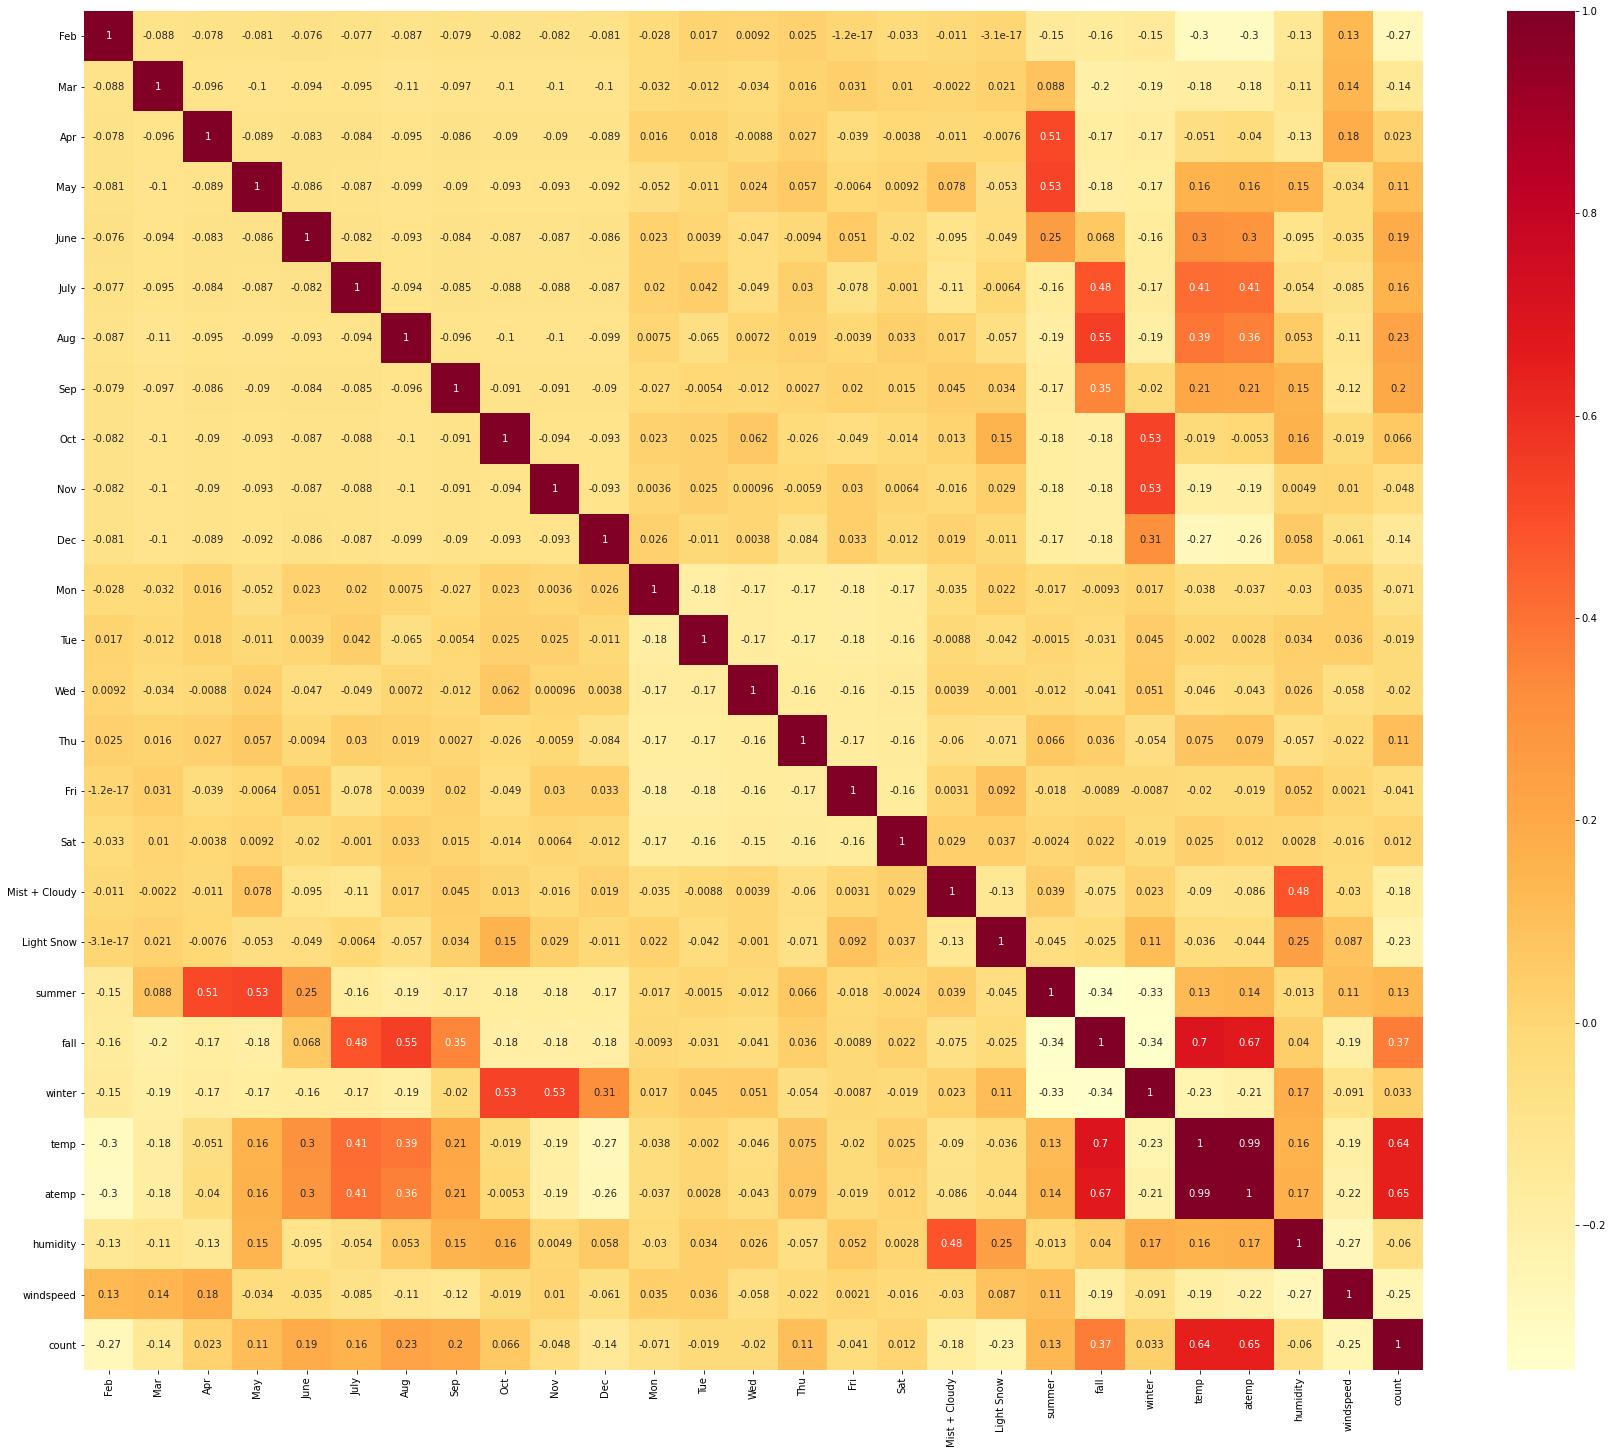

In [40]:
# Checking which variables are highly correlated after scaling is done
plt.figure(figsize=(30, 25))
sns.heatmap(bikeSharing_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

###  Dividing into X and Y sets for building the model

In [41]:
y_train = bikeSharing_train.pop('count')
X_train = bikeSharing_train

# Step 6: Build Linear Model using RFE (Recursive Feature Elimination) and Automated approach

In [42]:
# Importing Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
#Cutting down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Feb', False, 11),
 ('Mar', True, 1),
 ('Apr', False, 2),
 ('May', True, 1),
 ('June', False, 3),
 ('July', False, 12),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 13),
 ('Dec', False, 14),
 ('Mon', False, 9),
 ('Tue', False, 10),
 ('Wed', False, 8),
 ('Thu', False, 6),
 ('Fri', False, 7),
 ('Sat', False, 15),
 ('Mist + Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

### Building a model using statsmodel for detailed statistics

In [46]:
# Importing Libraries
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Mar', 'May', 'Aug', 'Sep', 'Oct', 'Mist + Cloudy', 'Light Snow',
       'summer', 'fall', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [48]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Feb', 'Apr', 'June', 'July', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'workingday', 'atemp'],
      dtype='object')

In [50]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['Mar', 'May', 'Aug', 'Sep', 'Oct', 'Mist + Cloudy', 'Light Snow',
       'summer', 'fall', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed']]

## Building Linear Regression Model

In [51]:
# Importing Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model 1

In [52]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.95e-189
Time:                        22:33:46   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2376      0.027      8.689

In [53]:
#Drop the constant term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [54]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,24.64
13,humidity,15.55
8,fall,8.80
14,windspeed,3.80
7,summer,3.73
9,winter,3.13
5,Mist + Cloudy,2.15
10,Year,2.04
2,Aug,1.85
1,May,1.68


#### From the above model, R-squared value is 0.846 and Adjusted R-squared value is 0.841. Dropping the May column because it has very high p-value

In [55]:
X_train_new1 = X_train_rfe.drop(["May"], axis = 1)

### Model 2

In [56]:
#Re-Building a model without May column
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.02e-190
Time:                        22:36:50   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2321      0.027      8.530

In [57]:
#Drop the constant term B
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,24.01
12,humidity,15.51
7,fall,8.53
13,windspeed,3.73
6,summer,3.51
8,winter,3.07
4,Mist + Cloudy,2.15
9,Year,2.03
1,Aug,1.85
3,Oct,1.64


#### After removing the May variable, it is observed there is no significant change in R-squared and Adjusted R-squared value, so dropping this (May variable) is acceptable. Further if we look at p-values of new model, there are some variables having high p-values

### Model 3

#### Dropping "Mar" column as it has high p-value which shows that this variable is insignificant

In [59]:
# Removing "Mar" column
X_train_new2 = X_train_lm1.drop(["Mar"], axis = 1)

In [60]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.27e-190
Time:                        22:41:01   Log-Likelihood:                 511.33
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     496   BIC:                            -935.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2397      0.027      8.877

In [61]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,23.85
11,humidity,15.35
6,fall,8.18
12,windspeed,3.65
5,summer,3.44
7,winter,2.87
3,Mist + Cloudy,2.14
8,Year,2.03
0,Aug,1.85
2,Oct,1.64


#### After removing the Mar variable, it is observed there is no significant change in R-squared and Adjusted R-squared value, so dropping this (Mar variable) is acceptable. Further if we look at p-values of new model, there are some variables having high p-values

#### Dropping "fall" variable as it has very high p-value and is insignificant

### Model 4

In [63]:
#Dropping "fall" variable
X_train_new3=X_train_lm2.drop(['fall'],axis=1)

In [64]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.02e-191
Time:                        22:42:43   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2390      0.027      8.848

In [65]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [66]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,14.41
9,temp,9.88
11,windspeed,3.59
6,winter,2.27
3,Mist + Cloudy,2.13
7,Year,2.02
5,summer,1.83
2,Oct,1.61
0,Aug,1.60
1,Sep,1.34


#### After removing the "fall" variable, it is observed there is no significant change in R-squared and Adjusted R-squared value, so dropping this ("fall" variable) is acceptable. Further if we look at p-values of new model.

#### If we look at the VIF values, humidity has high VIF very high value, so dropping this column to remove multicloinearity

### Model 5

In [67]:
#Removing "humidity" column
X_train_new4= X_train_lm3.drop(['humidity'], axis=1)

In [68]:
#Re-Building a model without humidity variable
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.21e-187
Time:                        22:44:54   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1355      0.017      8.079

In [69]:
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.11
10,windspeed,3.11
7,Year,2.00
6,winter,1.95
5,summer,1.82
2,Oct,1.60
0,Aug,1.59
3,Mist + Cloudy,1.49
1,Sep,1.34
4,Light Snow,1.09


#### After removing the "humidity" variable, it is observed there is not much change in R-squared and Adjusted R-squared value, so dropping this (humidity variable) is acceptable. Further if we look at p-values of new model, there are some variables having high p-values

#### Dropping "Oct" column as it has high p-value (>0.05)

### Model 6

In [71]:
# Removing "Oct" column
X_train_new5=X_train_lm4.drop(['Oct'], axis=1)

In [72]:
#Re-Building a model without "Oct" column
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.26e-187
Time:                        22:46:51   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1312      0.017      7.871

In [74]:
#Drop the constant
X_train_lm6=X_train_lm5.drop(['const'],axis=1)

In [75]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.01
9,windspeed,3.10
6,Year,2.00
4,summer,1.81
0,Aug,1.58
5,winter,1.49
2,Mist + Cloudy,1.48
1,Sep,1.31
3,Light Snow,1.08
7,holiday,1.04


#### Now the model looks good, as all the variables are significant (p-value < 0.05). Also all the variables have VIF less than 5 (which shows that there is no multi-colinearity). Only temp variable has 5.01 VIF which is almost 5 so it can be accepted and also we cannot drop this variable as it shows linear relationship with target variable.

#### This model looks good as all the variables are significant with very low p-values and also VIF for every variable is less than 5

### Inferences:
- All the variables are significant as we can see that each and every variable has p-value < 0.05

- All the variables have VIF value less than or equal to 5 which is a sign of no multi-colinearity

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.826 or 82.6%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.82 or 82%

# Step 7: Residual Analysis of train data

#### Linear Regression Assumptions:
-  Error terms are normally distributed with mean zero (not X, Y)
-  There is a linear relationship between X and Y
-  There is No Multicollinearity between the predictor variables.
-  The residuals (error terms) are independent of each other.
-  Homoscedasticity: The residuals have constant variance at every level of x.

In [80]:
X_train_lm5

,const,Aug,Sep,Mist + Cloudy,Light Snow,summer,winter,Year,holiday,temp,windspeed
653,1.0,0,0,0,0,0,1,1,0,0.509887,0.300794
576,1.0,0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,0,1,0,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,0,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,0,1,0,1,0,0.395666,0.188475
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,0,1,0,1,0,1,0,0.824514,0.355596
578,1.0,1,0,0,0,0,0,1,0,0.863973,0.187140
53,1.0,0,0,0,0,0,0,0,0,0.202618,0.111379
350,1.0,0,0,1,0,0,1,0,0,0.248216,0.431816


In [81]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

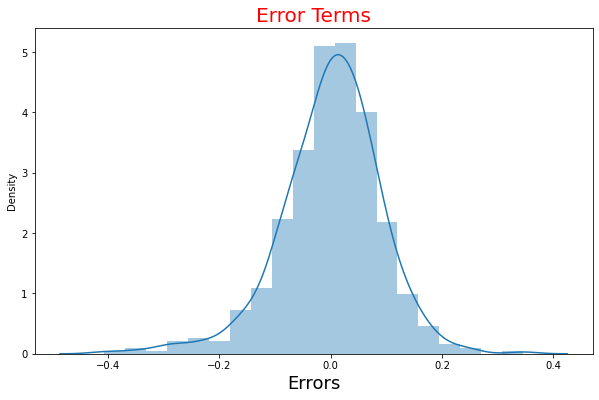

In [82]:
# Plot for residuals
fig = plt.figure()
plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20, color="red")       # Title of the plot 
plt.xlabel('Errors', fontsize = 18)  # X-label title
plt.show()

#### From the above plot, we can say that Error terms are normally distributed with mean zero (not X, Y)

Text(0, 0.5, 'Residual')

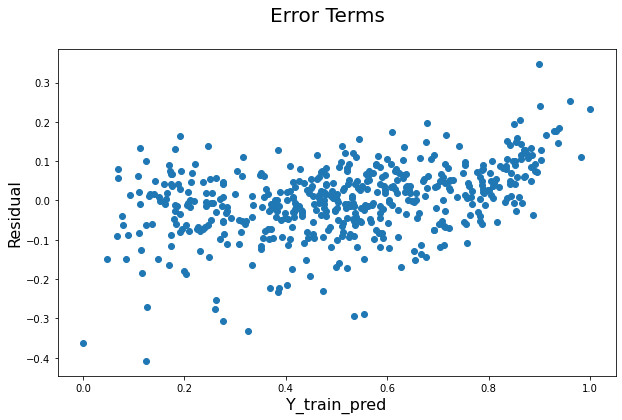

In [83]:
r = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(10,6))
plt.scatter(y_train,y_train-y_train_pred)
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Y_train_pred', fontsize=16)                      
plt.ylabel('Residual', fontsize=16)  

#### From the above plot, it can be concluded that the residuals does not form any specific pattern, and are randomly spread. Therefore, the error terms have constant variance (homoscedasticity)

In [85]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.01
9,windspeed,3.10
6,Year,2.00
4,summer,1.81
0,Aug,1.58
5,winter,1.49
2,Mist + Cloudy,1.48
1,Sep,1.31
3,Light Snow,1.08
7,holiday,1.04


#### From the above output, it can be observed that all the variables have VIF < 5, and hence there is no multicolinearity

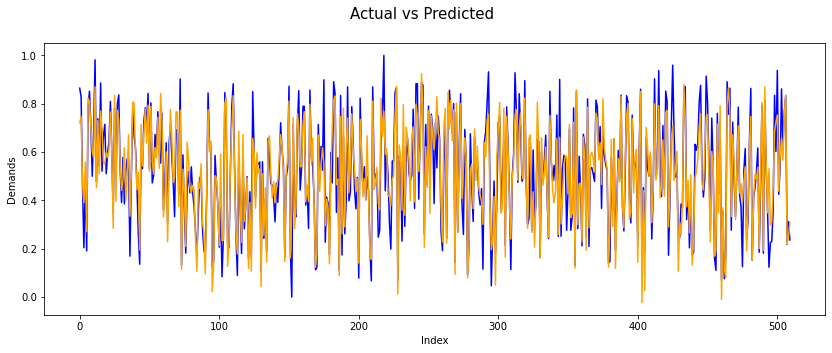

In [86]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_new5),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="orange")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### From the above plot it can be observed that the actual and predicted result follow almost the same pattern. Hence this model seems good


# Step 8: Making Predictions on Test Data

### Applying the scaling on the test sets

In [87]:
bikeSharing_test.head()

,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,...,fall,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,19.270000,22.85230,81.2917,13.250121,2659
221,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,29.315000,32.19710,30.5000,19.583229,4968


In [88]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','atemp','count']

In [89]:
#Fit on data
bikeSharing_test[num_vars] = scaler.transform(bikeSharing_test[num_vars])
bikeSharing_test.head()

,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,...,fall,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


### Dividing into X_test and y_test

In [90]:
#Dividing into X_test and y_test
y_test = bikeSharing_test.pop('count')
X_test = bikeSharing_test

In [91]:
X_train_new5.columns

Index(['Aug', 'Sep', 'Mist + Cloudy', 'Light Snow', 'summer', 'winter', 'Year',
       'holiday', 'temp', 'windspeed'],
      dtype='object')

In [93]:
# Now let's use our model to make predictions.

X_test_new=X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new=sm.add_constant(X_test_new)

# Making predictions
y_test_pred=lm5.predict(X_test_new)

## Model Evaluation

In [94]:
# R square value for test data
from sklearn.metrics import r2_score
r2_test=r2_score(y_test,y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.793


In [95]:
final_params=list(lm5.params.index)

In [96]:
N= len(X_test)          # sample size
p =len(final_params)     # Number of independent variable
r2_test_adjusted = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adjusted R-Squared for Test dataset: ', round(r2_test_adjusted,3))

Adjusted R-Squared for Test dataset:  0.782


Text(0, 0.5, 'Counts')

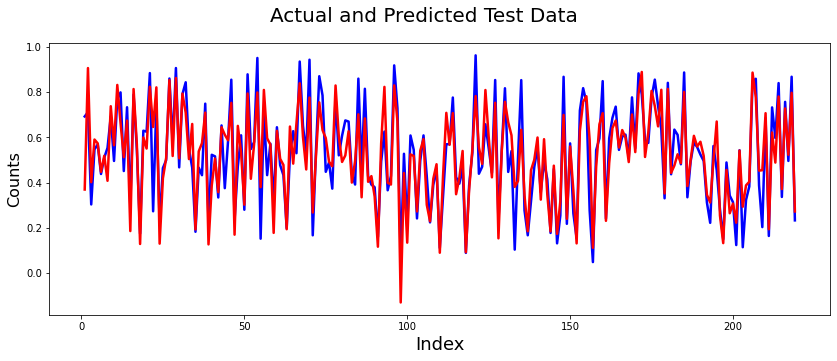

In [97]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted Test Data ', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)                               # Y-label

Text(0, 0.5, 'y_test_pred')

<Figure size 432x288 with 0 Axes>

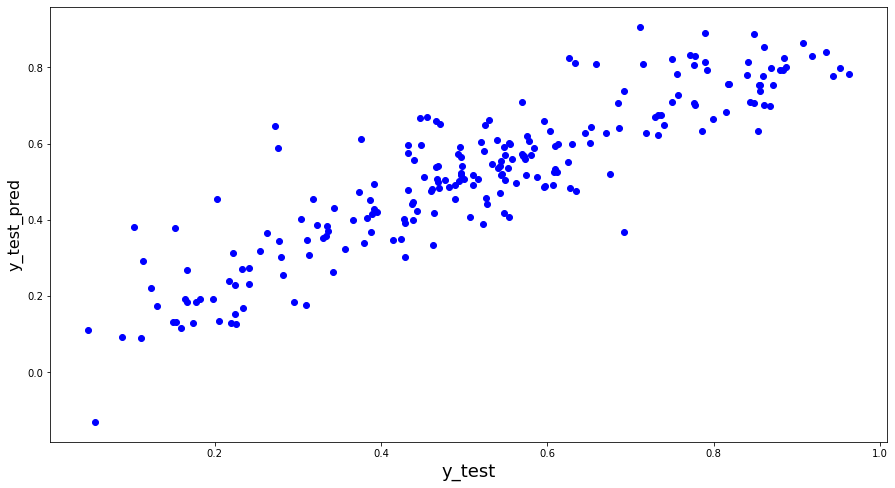

In [98]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_pred,color='blue')
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

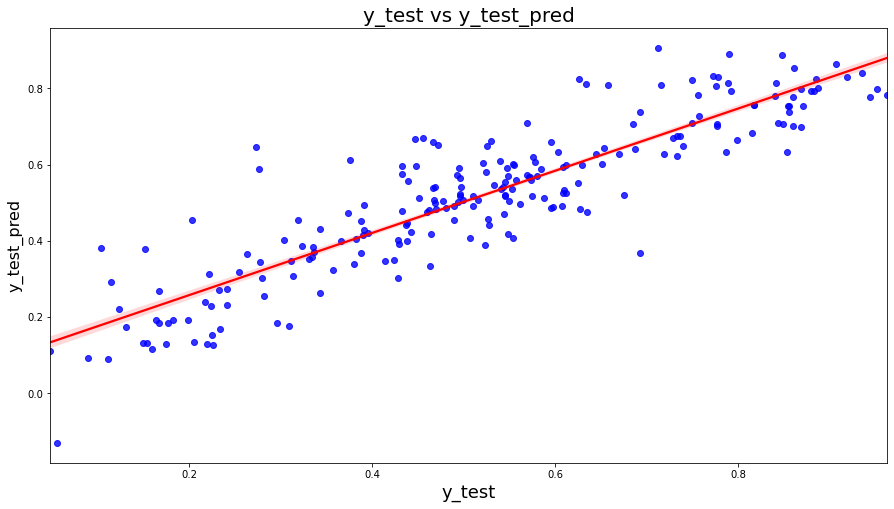

In [99]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

In [100]:
print('Final model parameters: \n', lm5.params)

Final model parameters: 
 const            0.131241
Aug              0.054165
Sep              0.116177
Mist + Cloudy   -0.082534
Light Snow      -0.282834
summer           0.099972
winter           0.138343
Year             0.232489
holiday         -0.097109
temp             0.517361
windspeed       -0.149737
dtype: float64


### We can see that the equation of our best fitted line is:

$ count= 0.1312 + 0.5173 \times temp + 0.05416 \times August +  0.1161 \times September  + 0.0999 \times summer + 0.1383 \times winter + 0.2324 \times Year - 0.1419 \times windspeed - 0.0971 \times holiday  − 0.0825 \times mistcloudy − 0.02828 \times lightsnow $

### Final Result Comparison between Train model and Test:
- Train R^2 : 0.834
- Train Adjusted R^2 : 0.831
- Test R^2: 0.793
- Test Adjusted R^2: 0.784
- Difference in R^2 between train and test: 4%
- Difference in adjusted R^2 between Train and test: 4.7% which is less than 5%

### Top 2 Significant Variables

-  Temp variable : if the temperature increases by one unit the number of bike rentals increases by 0.5173 units.
-  Light snow : if the light-snow weather is more severe, then there will be less number of bike rentals.

## Interpretation:
- We arrived at a very decent model for the the demand for shared bikes with the significant variables

- We can see that temp variable is having high coefficient 0.5173, which means if the temperature increases by one unit the number of bike rentals increases by 0.5173 units.

- Similary we can see coefficients of other variables in the equation for best fitted line.
- We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have windspeed, mist cloudy , light snow, holiday variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.